# Day 10 of Data Science Training by `Mr. Harshit Dawar`!

## CNN (Convolutional Neural Network)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = x_train[0].shape   ))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3)   ))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units = 757, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = "softmax"))

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 757)              

In [24]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [25]:
trained_model = model.fit(x_train, y_train, verbose = 1, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 96s 2ms/step - loss: 0.4345 - accuracy: 0.8411
Epoch 2/3
60000/60000 [==============================] - 96s 2ms/step - loss: 0.3041 - accuracy: 0.8888
Epoch 3/3
60000/60000 [==============================] - 118s 2ms/step - loss: 0.2613 - accuracy: 0.9039


In [26]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy'])

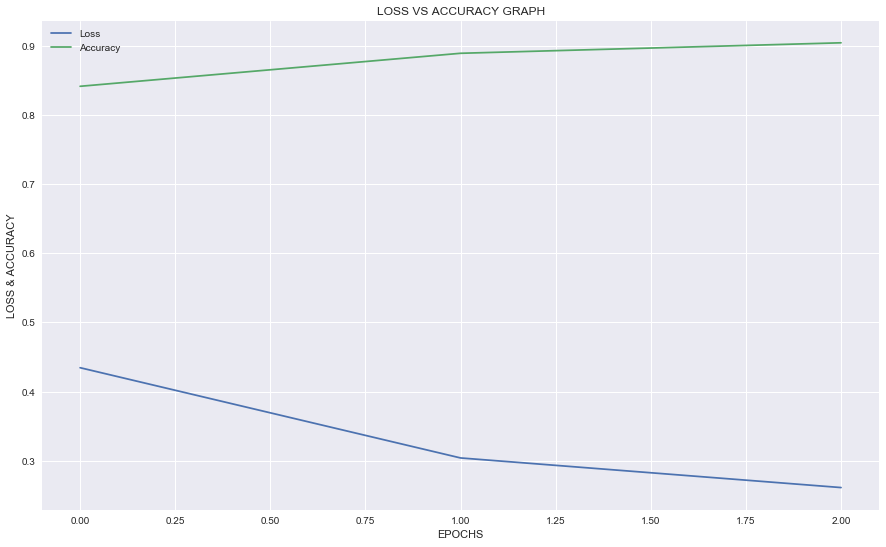

In [31]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(trained_model.history["loss"])
ax.plot(trained_model.history["accuracy"])
ax.legend(["Loss", "Accuracy"])
ax.set(title = "LOSS VS ACCURACY GRAPH", xlabel = "EPOCHS", ylabel = "LOSS & ACCURACY")
plt.show()

In [32]:
y_pred = model.predict_classes(x_test)

In [34]:
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.86      0.85      1000
           3       0.89      0.93      0.91      1000
           4       0.80      0.90      0.85      1000
           5       0.95      0.99      0.97      1000
           6       0.80      0.63      0.70      1000
           7       0.98      0.90      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [35]:
cm = confusion_matrix(y_test, y_pred)

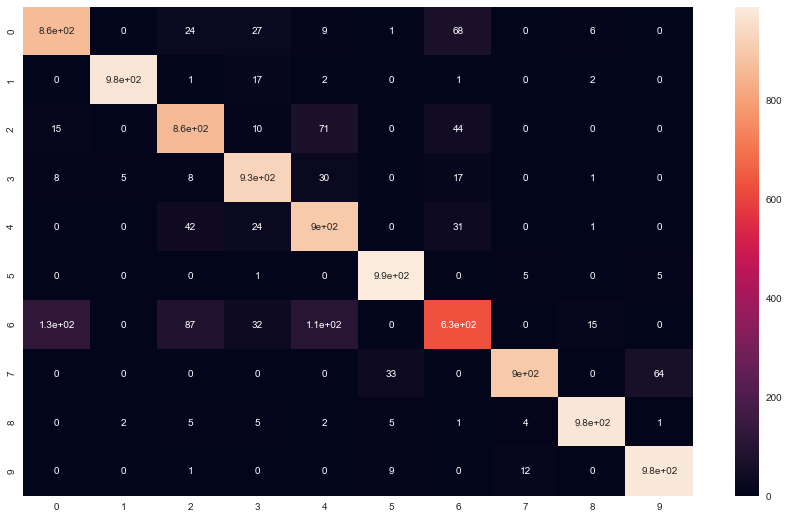

In [38]:
plt.figure(figsize = (15,9))
sns.heatmap(cm, annot = True)
plt.show()

In [43]:
acs = model.evaluate(x_test, y_test)[1]
acs = acs * 100
print(acs)

10000/10000 [==============================] - 3s 291us/step
90.1199996471405


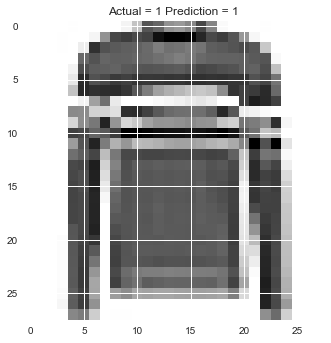

In [49]:
plt.imshow(x_train[5].reshape(x_train[5].shape[0], x_train[5].shape[1]))
plt.title("Actual = {} Prediction = {} ".format(y_test[5], y_pred[5]))
plt.show()

# Hope this project is easily understandable!